# 데이터스케일링과 범주특성의 변환

## 데이터 스케일링

- 스케일링이란 연속형 특성의 단위가 다를 경우 이로 인해 과대 혹은 과소한 파라미터가 추정될 수 있기 때문에 모든 자료에 대해서 동일한 기준으로 자료를 변환하는 것을 의미한다.

- 머신러닝/딥러닝 전에 특성변수의 스케일링 과정은 매우 중요하다

> 1. Min-Max Scaling

>> - 가장 대표적인 머신러닝/딥러닝의 스케일링 방법 

>> - 각 특성변수의 값과 최소값의 차이를 (최대-최소)로 나눔

>> - 이 경우 모든 값은 0 이상의 양(+)의 값을 가짐

>> - 이상치에 영향이 있음



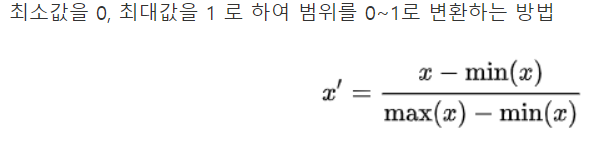

> 2. standardization

>> - 평균이 0, 표준편차가 1이 되는 통계적인 자료 표준화의 대표적 값

>> - 표준화를 하는 이유는?

>>>머신러닝에서 사용하는 Support Vector Machine, Linear Regression, Logistic Regression 모델은 데이터가 가우시안 분포를 가지고 있다고 가정하여 구현되어 있어서 사전에 학습 데이터에 관해 표준화를 적용하는 것이 모델의 예측 성능 향상에 중요하다.

# 실습 

## 1. 데이터 불러오기 & 범주/연속/레이블 분류


In [3]:
data<-read.csv("data/vote.csv", header=T)

In [4]:
head(data)

gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
1,4,3,3,3,2,2,4.0,1,2
1,5,2,3,3,2,4,3.0,0,3
1,3,1,2,4,1,3,2.8,1,4
2,1,2,1,3,5,4,2.6,1,1
1,1,1,2,4,4,3,2.4,1,1
1,1,1,2,4,1,4,3.8,1,2


In [5]:
data

gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
1,4,3,3,3,2,2,4.0,1,2
1,5,2,3,3,2,4,3.0,0,3
1,3,1,2,4,1,3,2.8,1,4
2,1,2,1,3,5,4,2.6,1,1
1,1,1,2,4,4,3,2.4,1,1
1,1,1,2,4,1,4,3.8,1,2
1,1,1,2,4,4,4,2.0,1,1
1,5,2,4,4,3,4,3.6,1,3
1,2,1,2,4,2,2,2.0,0,2
1,1,1,2,3,4,2,3.0,1,1


In [6]:
data_cat <-subset(data, select=c(gender, region))

In [11]:
data_cat

gender,region
1,4
1,5
1,3
2,1
1,1
1,1
1,1
1,5
1,2
1,1


In [9]:
data_num <-subset(data, select = c(edu, income, age, score_gov, score_progress, score_intention))

In [12]:
data_num

edu,income,age,score_gov,score_progress,score_intention
3,3,3,2,2,4.0
2,3,3,2,4,3.0
1,2,4,1,3,2.8
2,1,3,5,4,2.6
1,2,4,4,3,2.4
1,2,4,1,4,3.8
1,2,4,4,4,2.0
2,4,4,3,4,3.6
1,2,4,2,2,2.0
1,2,3,4,2,3.0


In [10]:
data_class<-subset(data, select=c(vote, parties))

In [13]:
data_class

vote,parties
1,2
0,3
1,4
1,1
1,1
1,2
1,1
1,3
0,2
1,1
